In [9]:
import pandas as pd
import numpy as np

df = pd.read_csv('titanic.csv')

In [10]:
def custom_hist(ls, interval_num):
    hist = dict()
    ls_max = np.max(ls)
    ls_min = np.min(ls)
    interval = (ls_max - ls_min) / interval_num
    for j in range(int(ls_min), int(ls_max), int(interval)):
        hist[f"{j}-{j+int(interval)}"] = len([num for num in ls if num > j and num <= j+interval])
    return hist

In [11]:
custom_hist(df["Age"].dropna(), 15)

{'0-5': 44,
 '5-10': 20,
 '10-15': 19,
 '15-20': 96,
 '20-25': 122,
 '25-30': 108,
 '30-35': 88,
 '35-40': 67,
 '40-45': 47,
 '45-50': 39,
 '50-55': 24,
 '55-60': 18,
 '60-65': 14,
 '65-70': 3,
 '70-75': 4,
 '75-80': 1}

In [47]:
# Faster runtime because it loops over fewer elements
def custom_hist_better(ls, interval_num):
    hist = dict()
    ls_max = np.max(ls)
    ls_min = np.min(ls)
    interval = (ls_max - ls_min) / interval_num
    for j in range(int(ls_min), int(ls_max), int(interval)):
        hist[f"({j}, {j + int(interval)})"] = 0
    for i in ls:
        for key in hist.keys():
            tup = eval(key)
            if i > int(tup[0]) and i <= int(tup[1]):
                hist[key] += 1
    return hist

In [13]:
custom_hist_better(df["Age"].dropna(), 15)

{'(0, 5)': 44,
 '(5, 10)': 20,
 '(10, 15)': 19,
 '(15, 20)': 96,
 '(20, 25)': 122,
 '(25, 30)': 108,
 '(30, 35)': 88,
 '(35, 40)': 67,
 '(40, 45)': 47,
 '(45, 50)': 39,
 '(50, 55)': 24,
 '(55, 60)': 18,
 '(60, 65)': 14,
 '(65, 70)': 3,
 '(70, 75)': 4,
 '(75, 80)': 1}

In [14]:
# Loops over entire list once and assigns to a temporary dictionary, then re-evaluates those to get buckets
# Theoretically fastest, but shown to be less accurate
def custom_hist_best(ls, interval_num):
    hist_all = dict()
    hist_int = dict()
    ls_max = np.max(ls)
    ls_min = np.min(ls)
    interval = (ls_max - ls_min) / interval_num
    for i in ls:
        hist_all[i] = hist_all.get(i, 0) + 1
    for j in range(int(ls_min), int(ls_max), int(interval)):
        hist_int[f"({j}, {j + int(interval)})"] = 0
    for key in hist_int.keys():
        for k in hist_all.keys():
            tup = eval(key)
            if int(k) > int(tup[0]) and int(k) <= int(tup[1]):
                hist_int[key] += hist_all[k]
    return hist_int

In [15]:
custom_hist_best(df["Age"].dropna(), 15)

{'(0, 5)': 37,
 '(5, 10)': 20,
 '(10, 15)': 19,
 '(15, 20)': 97,
 '(20, 25)': 121,
 '(25, 30)': 110,
 '(30, 35)': 86,
 '(35, 40)': 69,
 '(40, 45)': 47,
 '(45, 50)': 37,
 '(50, 55)': 25,
 '(55, 60)': 17,
 '(60, 65)': 14,
 '(65, 70)': 4,
 '(70, 75)': 3,
 '(75, 80)': 1}

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

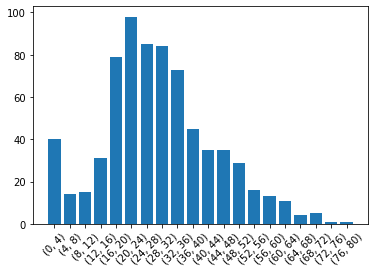

In [46]:
import matplotlib.pyplot as plt

hist_dict = custom_hist_better(df['Age'].dropna().values, 16)

plt.bar(hist_dict.keys(), hist_dict.values())
plt.xticks(rotation=45)

In [29]:
hist_male = custom_hist_better(df[df.Sex == 'male']['Age'].dropna().values, 16)
hist_female = custom_hist_better(df[df.Sex == 'male']['Age'].dropna().values, 16)

In [41]:
hist_male

{'(0, 4)': 23,
 '(4, 8)': 5,
 '(8, 12)': 9,
 '(12, 16)': 14,
 '(16, 20)': 51,
 '(20, 24)': 58,
 '(24, 28)': 62,
 '(28, 32)': 55,
 '(32, 36)': 47,
 '(36, 40)': 27,
 '(40, 44)': 23,
 '(44, 48)': 23,
 '(48, 52)': 19,
 '(52, 56)': 10,
 '(56, 60)': 8,
 '(60, 64)': 8,
 '(64, 68)': 4,
 '(68, 72)': 5,
 '(72, 76)': 1,
 '(76, 80)': 1}

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

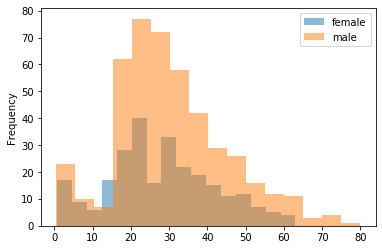

In [30]:
df.groupby('Sex')['Age'].plot(kind='hist', bins=16, alpha=0.5, legend=True)